# JFK Airport Flight Data Analysis
<b>by Athalia Setiawan</b><br>
<b>19 July 2023</b><br>
<b>UC San DiegoX: DSE200X EdX Course Final Project</b>


<br>
Analysis on JFK Airport Flight Take Off data to find at what time of day is are there the least delays and when are there the most flights at a period of time. 



In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [145]:
data = pd.read_csv('./data/JFK_TakeOffData.csv')
data.head(20)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,11,1,5,AA,N983NN,ORD,-1,161,740,359,...,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,11,1,5,AA,N107NN,LAX,-1,373,2475,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,11,1,5,B6,N274JB,BUF,-5,80,301,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,11,1,5,B6,N663JB,LGB,0,368,2465,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,11,1,5,B6,N283JB,FLL,3,184,1069,370,...,32,58,W,24,35,29.91,Fair / Windy,17,21,29


In [12]:
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [35]:
data.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
DEST                  object
DEP_DELAY              int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point             object
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
TAXI_OUT               int64
dtype: object

In [20]:
data.shape

(28820, 23)

In [21]:
data.dropna()
data.shape

(28820, 23)

## How many flights in each hour in one day (histogram)

In [146]:
hours = []
for i in range(25):
    #print(i*60)
    hours.append(i*60)

# filters the departure time and departure delay of flights on a specific day
def daysch(month,date):
    mask = data['MONTH']==month
    mask2 = data['DAY_OF_MONTH']==date
    d3 = data[['DEP_TIME_M', 'DEP_DELAY']][mask & mask2]
    return d3

# number of flights within each hour of the day
def hrflight(d3):
    d4 = d3.groupby(pd.cut(d3['DEP_TIME_M'], hours)).count()
    d4 = d4.rename(columns={'DEP_TIME_M': 'dep_all', 'DEP_DELAY':'delays'})
    del d4['delays']
    return d4

# number of delayed flights (flights late by more than 15 minutes) within each hour of the day
def hrdelay(d3):
    d4 = d3[d3['DEP_DELAY']>15].groupby(pd.cut(d3['DEP_TIME_M'], hours)).count()
    d4 = d4.rename(columns={'DEP_TIME_M': 'dep_del', 'DEP_DELAY':'delays'})
    del d4['delays']
    return d4

In [240]:
hrdelay(daysch(11,6))

,DEP_TIME_M,DEP_DELAY
DEP_TIME_M,,
"(0, 60]",1,1
"(60, 120]",0,0
"(120, 180]",0,0
"(180, 240]",0,0
"(240, 300]",0,0
"(300, 360]",0,0
"(360, 420]",1,1
"(420, 480]",1,1
"(480, 540]",1,1


In [7]:
def barcht(df,x,y,xlabel,ylabel, title):
    X = x
    Y = df[y].values
    plt.bar(X,Y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


### Definition of all the hourly flights and hourly delays tables

In [140]:
# very important: defines all the hourly flights and hourly delays tables
data3 = daysch(11,1)
data4 = hrflight(data3)
data5 = hrdelay(data3)
#data3[(data3['DEP_TIME_M']>0) & (data3['DEP_TIME_M']<=60)  ]
data3

,DEP_TIME_M,DEP_DELAY
0,323,-1
1,333,-7
2,341,40
3,343,-2
4,356,-4
...,...,...
296,1374,-6
297,1402,27
298,1424,54
299,1425,25


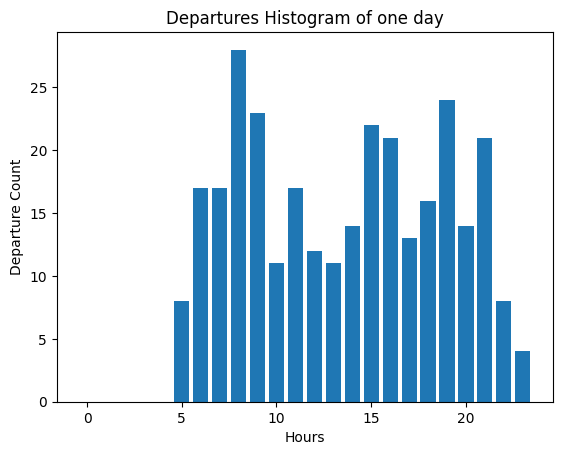

In [141]:
barcht(data4,range(24),'dep_all', 'Hours', 'Departure Count', 'Departures Histogram of one day')

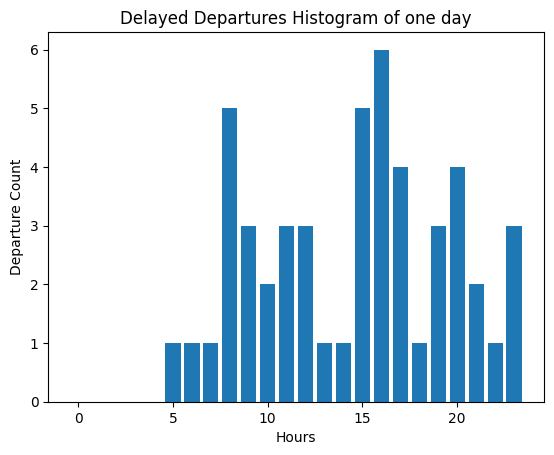

In [142]:
data5 = hrdelay(data3)
barcht(data5,range(24),'dep_del', 'Hours', 'Departure Count', 'Delayed Departures Histogram of one day')


In [143]:
def barcht2(df,df2, x, y,y2,xlabel,ylabel, blabel,blabel2, title):
    X = np.arange(len(x))
    Y = df[y].values
    Y2 = df2[y2].values
    width = 0.4
    
    #draw grouped bar chart
    fig, ax = plt.subplots()
    bar1 = ax.bar(X - width/2, Y, width, label=blabel)
    bar2 = ax.bar(X + width/2, Y2, width, label=blabel2)
    
    #ax.set_xlabel('Year')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(X, x)
    ax.legend()
    
    #setting bar labels
    ax.bar_label(bar1)
    ax.bar_label(bar2)

    fig.tight_layout()

    plt.show()

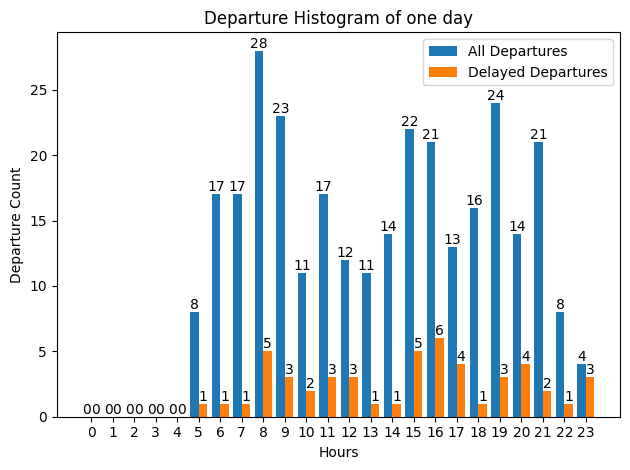

In [144]:
barcht2(data4,data5,range(24),'dep_all','dep_del', 'Hours', 'Departure Count','All Departures','Delayed Departures', 'Departure Histogram of one day')

## Heatmap of percentage of delayed flights per hour for one month

#### get the percentage of delayed flights per hour for one day

In [67]:
data4, data5

(              dep_all
 DEP_TIME_M           
 (0, 60]             0
 (60, 120]           0
 (120, 180]          0
 (180, 240]          0
 (240, 300]          0
 (300, 360]          8
 (360, 420]         17
 (420, 480]         17
 (480, 540]         28
 (540, 600]         23
 (600, 660]         11
 (660, 720]         17
 (720, 780]         12
 (780, 840]         11
 (840, 900]         14
 (900, 960]         22
 (960, 1020]        21
 (1020, 1080]       13
 (1080, 1140]       16
 (1140, 1200]       24
 (1200, 1260]       14
 (1260, 1320]       21
 (1320, 1380]        8
 (1380, 1440]        4,
               dep_del
 DEP_TIME_M           
 (0, 60]             0
 (60, 120]           0
 (120, 180]          0
 (180, 240]          0
 (240, 300]          0
 (300, 360]          1
 (360, 420]          1
 (420, 480]          1
 (480, 540]          5
 (540, 600]          3
 (600, 660]          2
 (660, 720]          3
 (720, 780]          3
 (780, 840]          1
 (840, 900]          1
 (900, 960

In [80]:
# merge hrflight with hrdelay, then make a new column with the values of hrdelay divided by hrflight (*100?)
delpercent = data4.copy()
'''delpercent['dep_del'] = data5.copy()
delpercent['hour'] = range(24)
delpercent['delay_per'] = delpercent['dep_del']/delpercent['dep_all']*100'''
delpercent

,dep_all
DEP_TIME_M,
"(0, 60]",0
"(60, 120]",0
"(120, 180]",0
"(180, 240]",0
"(240, 300]",0
"(300, 360]",8
"(360, 420]",17
"(420, 480]",17
"(480, 540]",28


In [137]:
mont = 11
days = range(1,31)
delpercent = data4.copy()
del delpercent['dep_all']
allflight = delpercent.copy()
for i in days:
    data3 = daysch(mont,i)
    data4 = hrflight(data3)
    data5 = hrdelay(data3)
    coln = 'delay_'+str(i)
    delpercent[coln] = data5['dep_del']/data4['dep_all']*100

for i in days:
    data3 = daysch(mont,i)
    data4 = hrflight(data3)
    coln = 'depart_'+str(i)
    allflight[coln] = data4['dep_all']

##### create heatmap of percentage of delayed flights per hour over a month

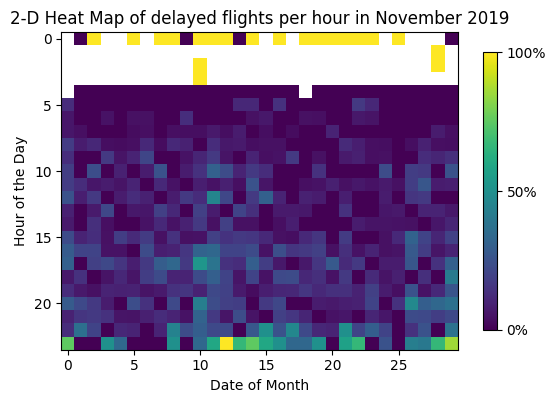

<Figure size 1000x1200 with 0 Axes>

In [139]:

plt.imshow( delpercent)
 
cbar = plt.colorbar(shrink=0.75, ticks=[0, 50, 100])
cbar.ax.set_yticklabels(['0%', '50%', '100%'])
    
plt.title( "2-D Heat Map of delayed flights per hour in November 2019" )
plt.xlabel('Date of Month')
plt.ylabel('Hour of the Day')

plt.figure(figsize=(10,12))
plt.show()

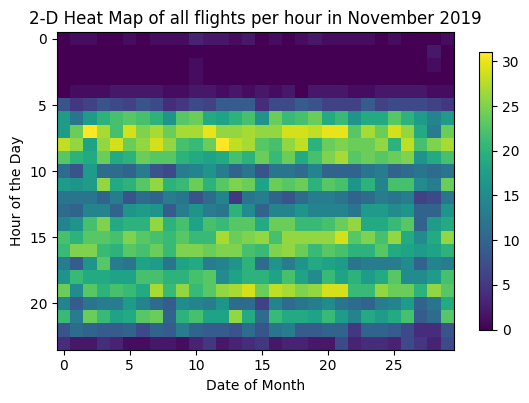

<Figure size 1000x1200 with 0 Axes>

In [138]:

plt.imshow( allflight)
 
plt.colorbar(shrink=0.75)
    
plt.title( "2-D Heat Map of all flights per hour in November 2019" )
plt.xlabel('Date of Month')
plt.ylabel('Hour of the Day')

plt.figure(figsize=(10,12))
plt.show()